In [61]:
import matplotlib.pyplot as plt
import numpy as np


def derivative(x, beta, gamma, N):
    s, i, r = x
    return np.array([-beta * s * i / N, beta * s * i / N - gamma * i, gamma * i])

# define standard explicit euler function
def explicit_euler(x0, t0, dt, T, beta, gamma, N):
    x = [x0]
    t = t0 + dt
    while t < T:
        x.append(x[-1] + dt * derivative(x[-1], beta, gamma, N))
        t += dt
    return x

In [62]:
# apply explicit euler to solve the SIR model
def solve(s0, i0, r0, beta, gamma, T):
    x0 = np.array([s0, i0, r0])
    t0 = 0
    N = s0 + i0 + r0
    dt = 1 # time step = 1 day 
    x = explicit_euler(x0, t0, dt, T, beta, gamma, N)
    t = np.arange(0, T + dt, dt)
    s, i, r = np.array(x).T
    return s, i, r, t

def SIR_model(s0, i0, r0, beta, gamma, T):
    s, i, r, t = solve(s0, i0, r0, beta, gamma, T)
    plt.plot(t, i)

The number of infected individuals drop below 1 at day: 26


Text(0.5, 1.0, 'case / time')

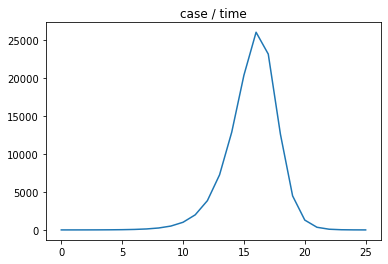

In [86]:
N = 134000
s, i, r, t = solve(N - 1, 1, 0, 2, 1, 30)
infected_drop = 0
while (i[infected_drop] >= 1):
    infected_drop += 1
print("The number of infected individuals drop below 1 at day:",infected_drop)
plt.plot(t[:infected_drop], i[:infected_drop])
plt.title("case / time")


In [89]:
N = 134000
s, i, r, t = solve(N - 1, 1, 0, 2, 1, 30)
day = 1
while (1):
    if (i[day] > i[day - 1]) and (i[day] > i[day + 1]):
        break
    day += 1
print ("Peak is day:",day,"; Infected cases are:", i[day])


Peak is day: 16 ; Infected cases are: 26033.391521237274


In [84]:
def heatmap():
    beta = np.arange(1.5, 2.5, 0.1)
    gamma = np.arange(0.5, 1.5, 0.1)
    peak = np.zeros((len(gamma), len(beta)))
    time = np.zeros((len(gamma), len(beta)))
    for i in range(len(beta)):
        for j in range(len(gamma)):
            ind, inf = find_peak(beta[i], gamma[j])
            peak[j][i] = inf
            time[j][i] = ind
    return peak, time
peak, time = heatmap()

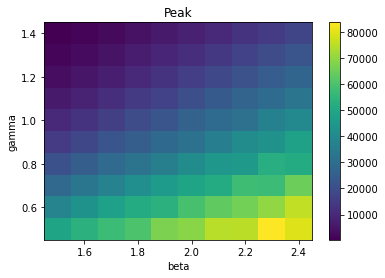

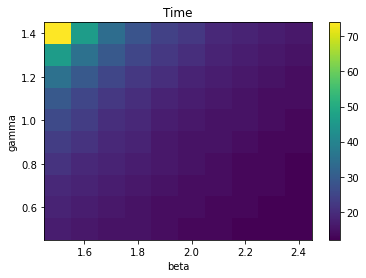

In [85]:
beta = np.arange(1.5, 2.5, 0.1)
gamma = np.arange(0.5, 1.5, 0.1)
plt.pcolormesh(beta, gamma, peak)
plt.colorbar()
plt.xlabel("beta")
plt.ylabel("gamma")
plt.title("Peak")
plt.show()

plt.pcolormesh(beta, gamma, time)
plt.colorbar()
plt.xlabel("beta")
plt.ylabel("gamma")
plt.title("Time")
plt.show()

